In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6583,9617-UDPEU,Female,0,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,No
1545,5193-QLVZB,Male,0,No,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.75,6536.5,No
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
4791,7808-DVWEP,Male,0,Yes,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,49.65,No
2151,2560-WBWXF,Male,0,No,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.15,1498.85,No


In [3]:
df.drop('customerID', axis='columns', inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df["MonthlyCharges"].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df["TotalCharges"], errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df[pd.to_numeric(df["TotalCharges"], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.iloc[488]["TotalCharges"]

' '

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
mean_total_charges = df['TotalCharges'].mean()

In [16]:
# Fill the missing values with the mean
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

/var/folders/xx/cywwcfkn3n954jx78cwzh20w0000gn/T/ipykernel_17539/3976366446.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [17]:
# Convert the column to integers
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges          int64
Churn                object
dtype: object

In [19]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3112,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),100.55,7325,No
553,Female,0,Yes,Yes,23,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.60,514,No
2578,Female,1,Yes,Yes,31,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.90,2911,Yes
3649,Male,0,Yes,Yes,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.35,1847,No
659,Male,0,Yes,No,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.35,697,No


In [20]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                             2283
Churn                                      No
Name: 488, dtype: object

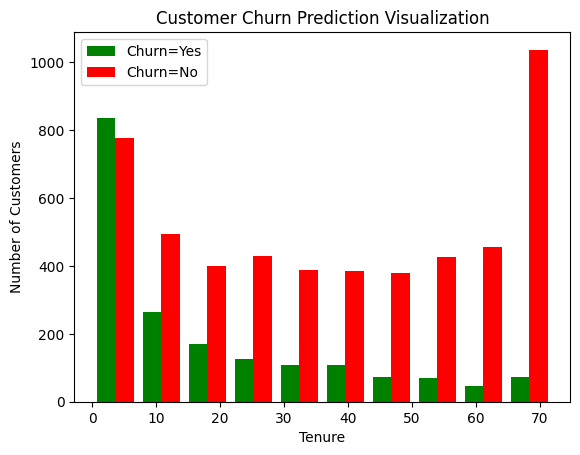

In [24]:
tenure_churn_no = df[df["Churn"]=="No"]["tenure"]
tenure_churn_yes = df[df["Churn"]=="Yes"]["tenure"]

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()

people with 70 months didnt return  
people with 0 months return


In [27]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f"{column}: {df[column].unique()}")

In [28]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [29]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [30]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

/var/folders/xx/cywwcfkn3n954jx78cwzh20w0000gn/T/ipykernel_17539/1968106336.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes': 1,'No': 0},inplace=True)
/var/folders/xx/cywwcfkn3n954jx78cwzh20w0000gn/T/ipykernel_17539/1968106336.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [32]:
print_unique_col_values(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [33]:
df["gender"].replace({"female":0, "male":1}, inplace=True)

In [37]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4408,Female,0,1,1,72,1,1,1,0,1,...,True,False,False,False,False,True,True,False,False,False
2447,Male,0,0,0,7,1,0,0,0,1,...,False,True,False,True,False,False,False,False,True,False
5146,Male,0,0,1,11,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
837,Male,0,0,0,1,1,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
4115,Male,0,1,0,53,1,1,1,0,1,...,True,False,False,False,True,False,True,False,False,False


In [42]:
for col in df.columns:
    df[col].replace({True: 1,False: 0},inplace=True)

df.sample(5)

/var/folders/xx/cywwcfkn3n954jx78cwzh20w0000gn/T/ipykernel_17539/86062809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({True: 1,False: 0},inplace=True)
/var/folders/xx/cywwcfkn3n954jx78cwzh20w0000gn/T/ipykernel_17539/86062809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2085,Female,1,1,0,32,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6188,Male,0,0,0,18,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2380,Male,0,1,1,60,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1947,Female,0,0,0,70,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
874,Male,0,0,1,45,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0


In [43]:
from sklearn.preprocessing import MinMaxScaler


In [44]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [45]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4367,Male,1,1,0,0.500000,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
788,Female,0,1,1,0.333333,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4315,Female,0,0,0,0.013889,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5699,Male,0,0,0,0.208333,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5415,Female,0,0,0,0.250000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [46]:
df.gender.replace({"Female":0, "Male":1}, inplace=True)

/var/folders/xx/cywwcfkn3n954jx78cwzh20w0000gn/T/ipykernel_17539/403793072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.gender.replace({"Female":0, "Male":1}, inplace=True)


In [47]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4554,1,0,0,0,0.277778,1,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
5582,0,0,0,0,0.666667,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1776,1,1,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
6747,0,0,1,0,0.722222,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2214,0,0,0,0,0.194444,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split

x = df.drop('Churn', axis='columns')
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)

x_train.shape, x_test.shape

((5634, 26), (1409, 26))

In [49]:
import tensorflow as tf
from tensorflow import keras

2024-07-14 12:45:57.675417: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100


/Users/karim/.local/share/virtualenvs/Deep_Learning-Q4cCvLKj/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.7075 - loss: 0.5706
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7970 - loss: 0.4330
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8062 - loss: 0.4130
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7985 - loss: 0.4244
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.7979 - loss: 0.4205
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8037 - loss: 0.4160
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8100 - loss: 0.4114
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.8131 - loss: 0.4102
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.7969 - loss: 0.4355
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8075 - loss: 0.4153
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.8143 - loss: 0.4076
Epoch 12/100
177/177 ━━━━━━━━━━

In [52]:
model.save_weights('churn.weights.h5')

In [ ]:
model.load_weights('churn.weights.h5')

In [53]:
model.evaluate(x_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7819 - loss: 0.4651 


[0.46618765592575073, 0.779985785484314]

In [56]:
y_hat = model.predict(x_test)
y_pred = []
for y in y_hat:
    if y > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


In [57]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [58]:
y_test[:10]

4187    0
638     1
2791    0
1607    1
2666    0
6156    0
2132    0
3778    0
5420    0
6635    0
Name: Churn, dtype: int64

In [59]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



Text(8.222222222222223, 0.5, 'Truth')

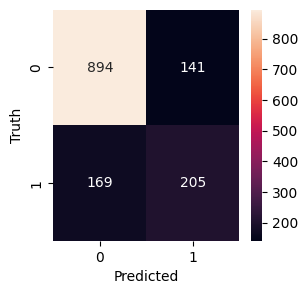

In [63]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred) 

plt.figure(figsize = (3,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')